**Note:**
 `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`

In [1]:
!nvidia-smi

Thu Sep  5 10:10:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
#YOLOv10 Installation

!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q supervision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 5.3 MB/s eta 0:00:00


In [4]:
# Installation of weights for pretrained COCO dataset

!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 26 15:53 yolov10b.pt
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt
-rw-r--r-- 1 root root  64M May 26 15:54 yolov10m.pt
-rw-r--r-- 1 root root  11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root  32M May 26 15:54 yolov10s.pt
-rw-r--r-- 1 root root 123M May 26 15:54 yolov10x.pt


In [5]:
# Example Image

!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://adigaskell.org/wp-content/uploads/2019/04/cctv-footage.jpg
!ls -lh {HOME}/data

total 132K
-rw-r--r-- 1 root root 130K Apr  9  2019 cctv-footage.jpg


In [6]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
results = model(source=f'{HOME}/data/cctv-footage.jpg', conf=0.25)

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



image 1/1 /content/data/cctv-footage.jpg: 448x640 6 persons, 2 cars, 95.0ms
Speed: 12.5ms preprocess, 95.0ms inference, 528.0ms postprocess per image at shape (1, 3, 448, 640)


In [7]:
# Position of object
results[0].boxes.xyxy

tensor([[325.2435, 149.1974, 395.6448, 336.3369],
        [163.8633,  93.6325, 392.3223, 198.9007],
        [243.1920, 179.9103, 316.6427, 401.6707],
        [563.4289, 196.6626, 667.6288, 410.8605],
        [159.2955, 316.1683, 274.4833, 484.8923],
        [499.6109, 156.6122, 572.2723, 330.3409],
        [379.1267,  80.0279, 511.5579, 163.3327],
        [243.7293, 108.3879, 282.8113, 199.9218]], device='cuda:0')

In [8]:
# Confidence
results[0].boxes.conf

tensor([0.8724, 0.8604, 0.8301, 0.8117, 0.7839, 0.7027, 0.6456, 0.2703], device='cuda:0')

In [9]:
# Classification
results[0].boxes.cls

tensor([0., 2., 0., 0., 0., 0., 2., 0.], device='cuda:0')


0: 448x640 6 persons, 2 cars, 17.0ms
Speed: 3.1ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


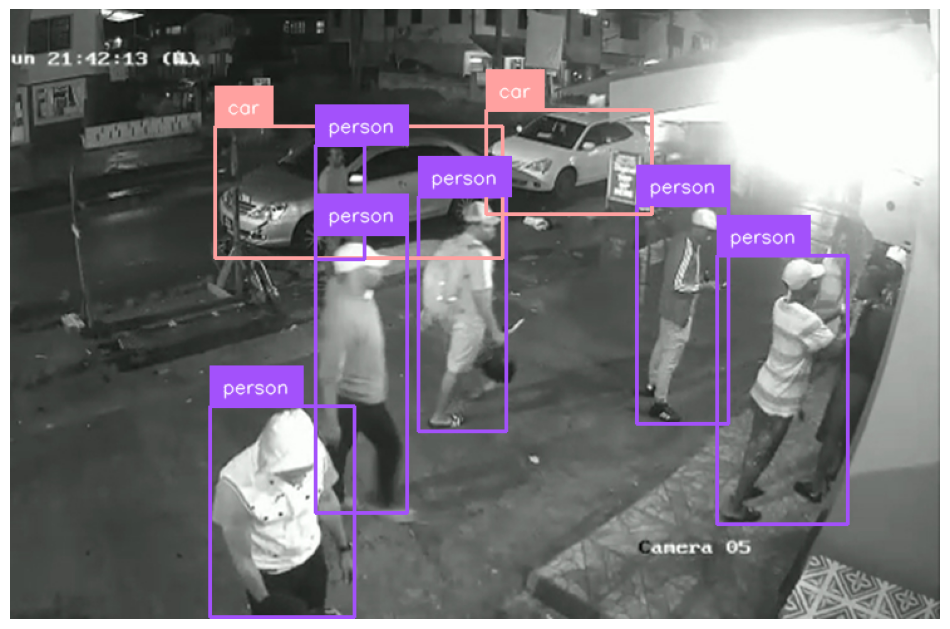

In [10]:
# Display using supervision

import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/weights/yolov10n.pt')
image = cv2.imread(f'{HOME}/data/cctv-footage.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)